Step 1. Load Data

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv("https://raw.githubusercontent.com/arima2515/PDS-Project/main/winequality-red.csv", delimiter=";")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Step 2. Quick look through the data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


As we can see, there are 12 observation in our dataset, and 1599 row of data. And there are none of null data in dataset. All of our data have a number type which divided into float and integer

In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Using describe function, we can see deeper in dataset. Describe shows statistic data like mean, standart deviation, min max value, median, etc.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffb5d4ce6d0>,
      dtype=object)

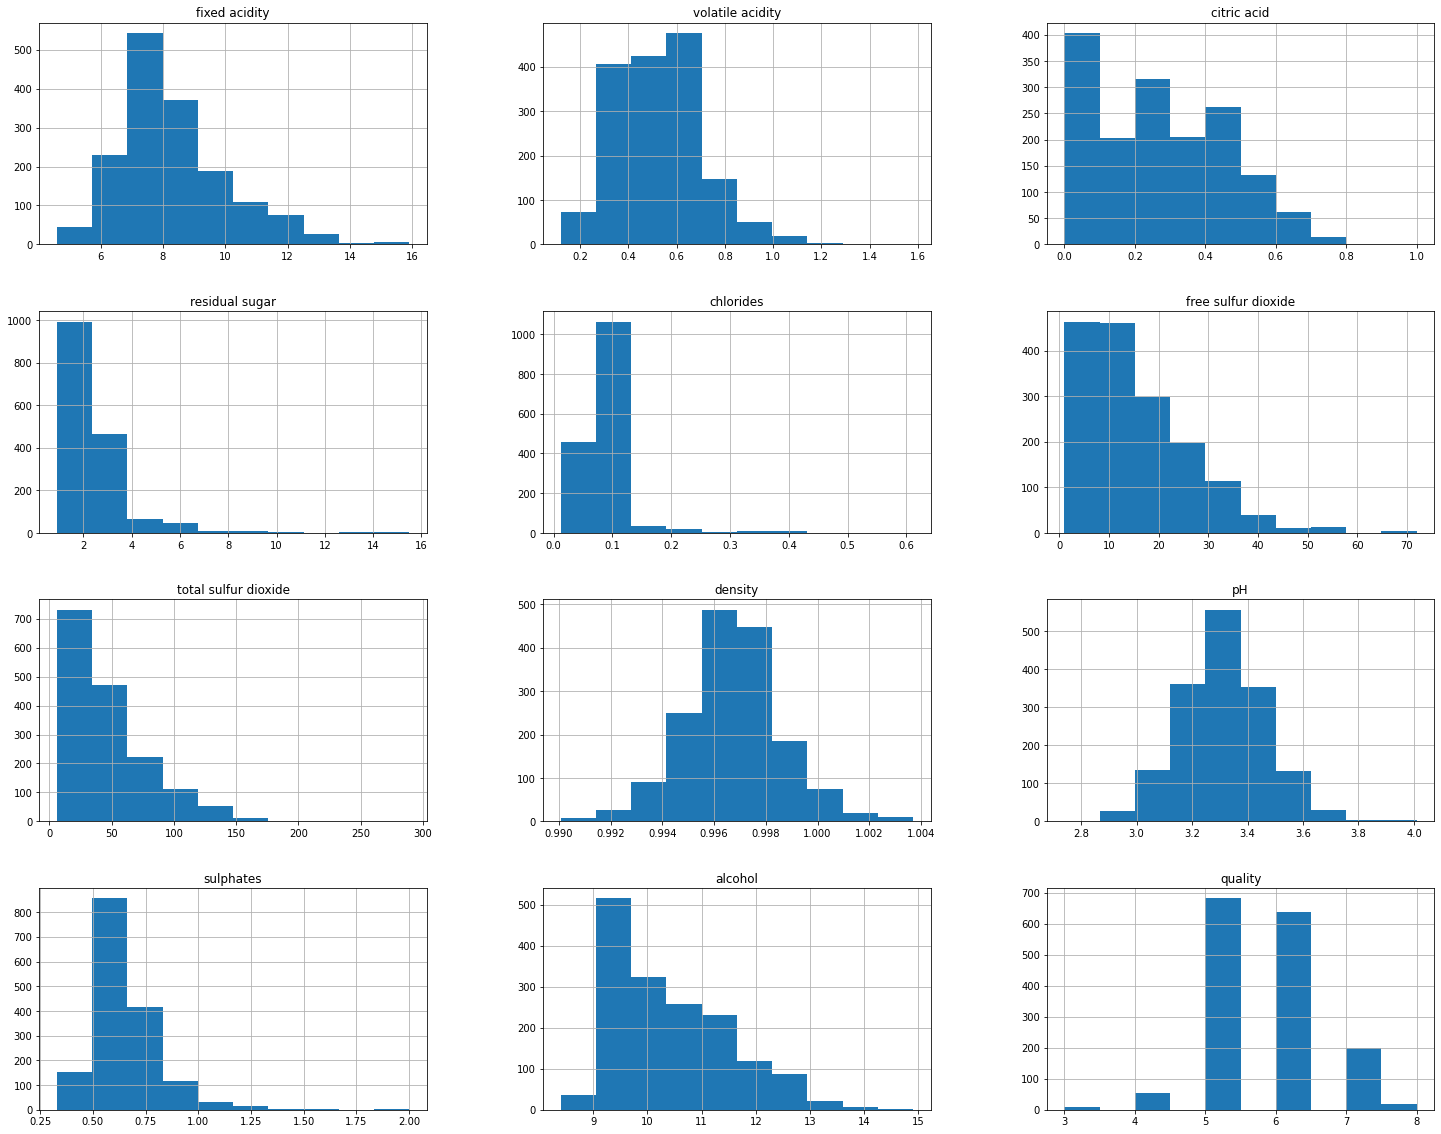

In [ ]:
data.hist(figsize=(25,20))

Using hist function to get histogram from the data in every column. We can se distribution from the data.

Step 3. Data understanding

a. Sum of the data

In [ ]:
print("We have {:n} observation, and {:n} rows in our dataset".format(data.shape[0], data.shape[1]))

We have 1599 observation, and 12 rows in our dataset


b. Data correlation


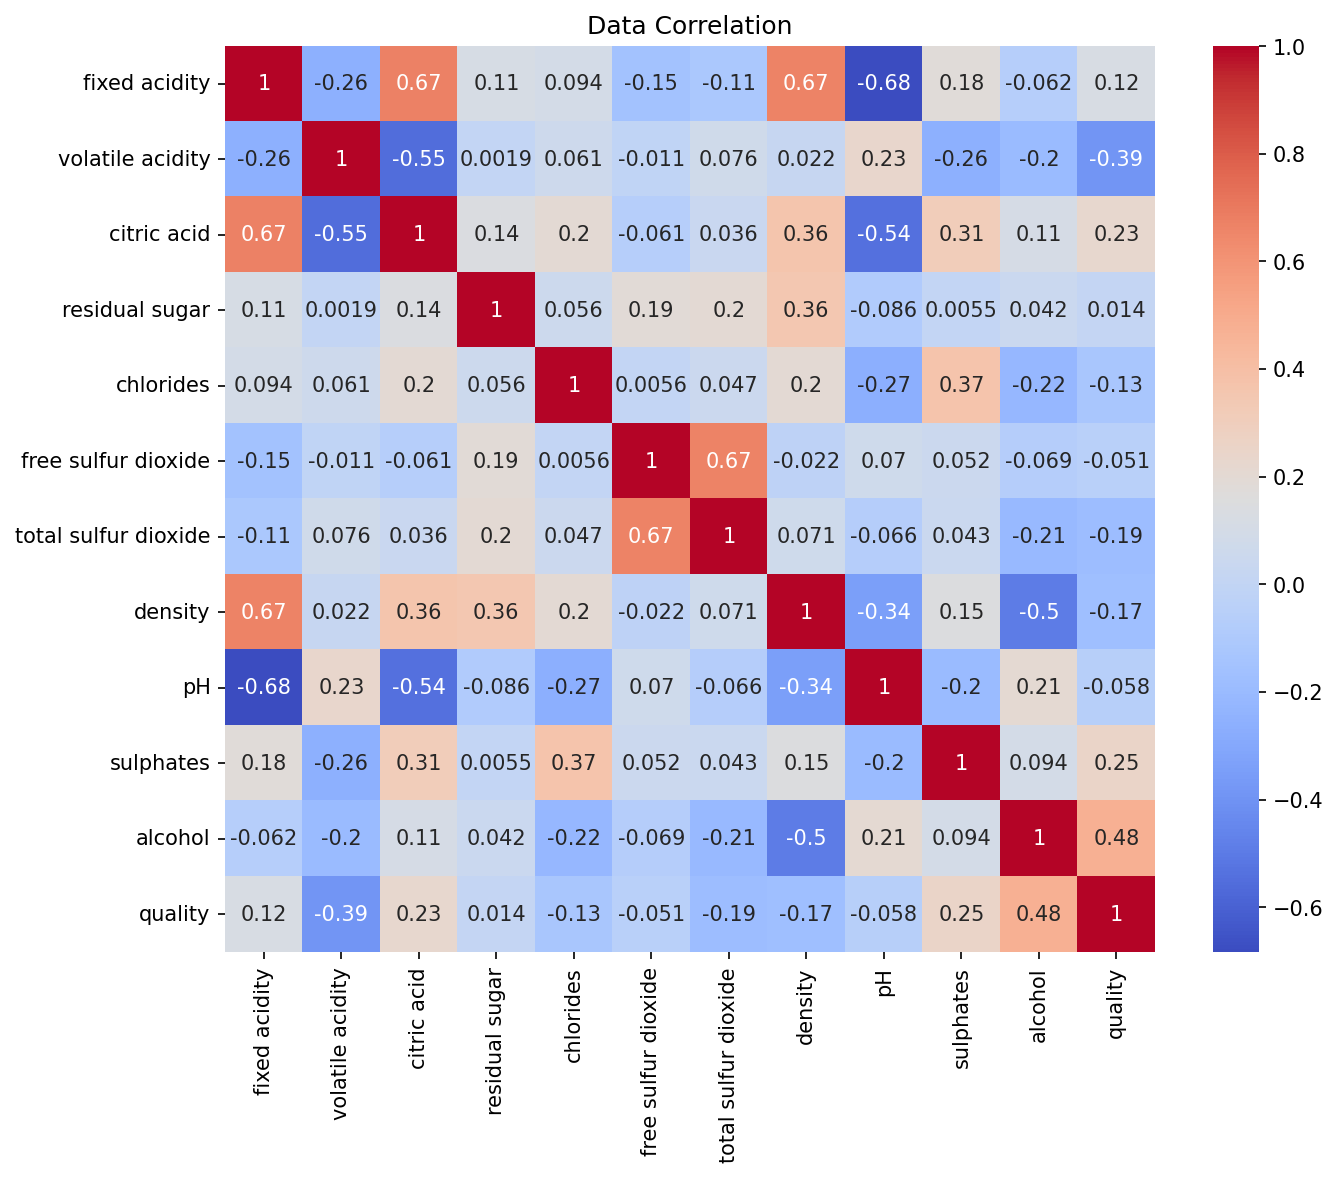

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.dpi"] = 150
plt.figure(figsize=(10,8))
plt.title("Data Correlation")
sns.heatmap(data.corr(), cmap="coolwarm", annot=True)
plt.show()

Through visualization above, we can see the correlation between column. We can get know which column that affect quality the most. Columns that have the most impact to decide the wine quality based on diagram above, is alcohol column. 

c. Distribution of data


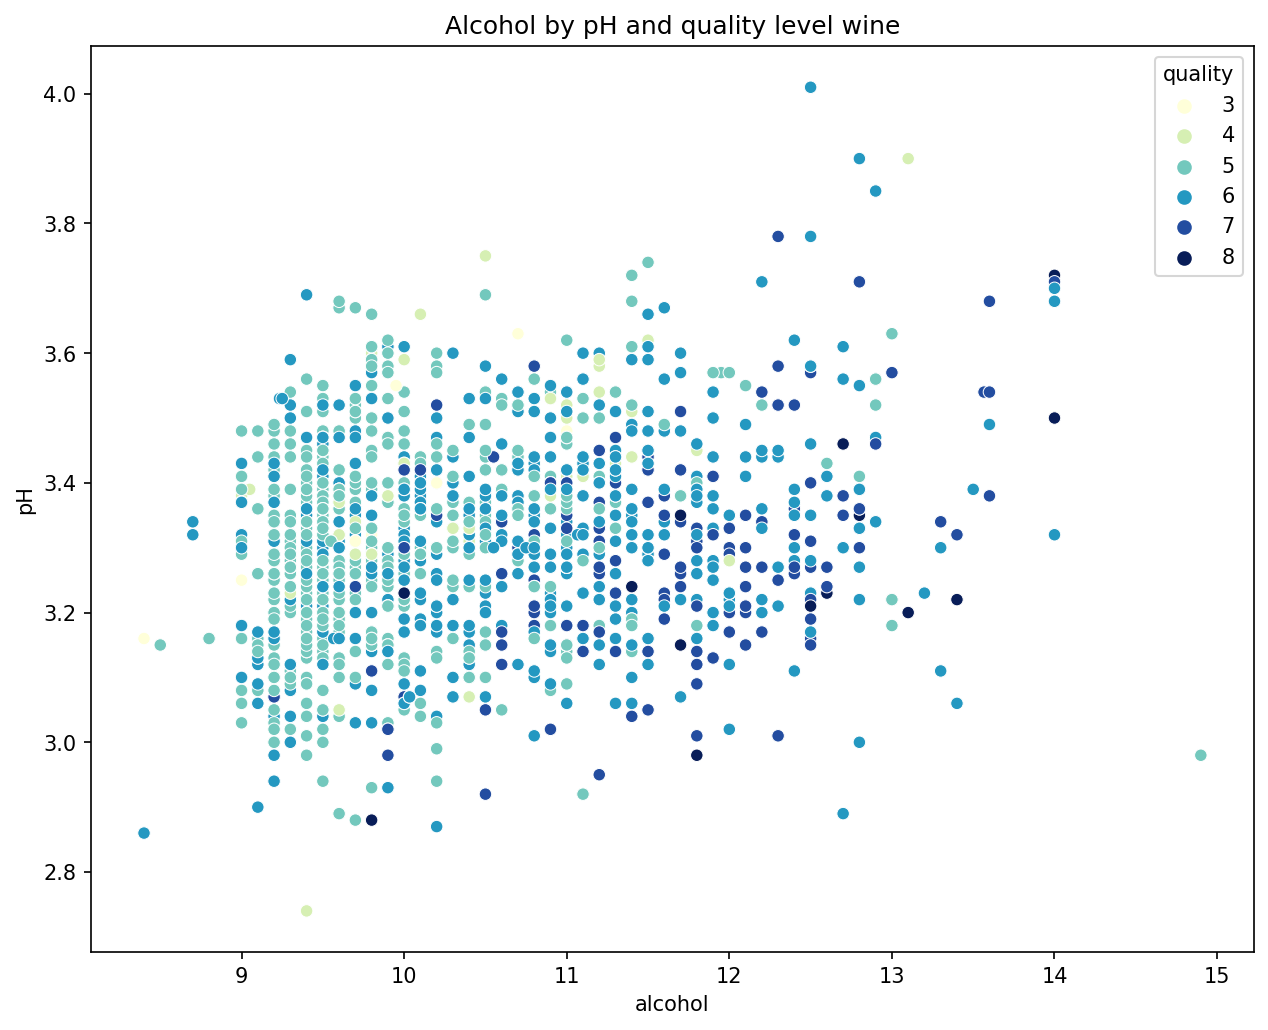

In [ ]:
plt.figure(figsize=(10,8))
plt.title("Alcohol by pH and quality level wine")
sns.scatterplot(x= data.alcohol, y= data.pH, hue=data.quality, palette="YlGnBu", data = data)
plt.show()

From the visualization above, we can get insight that high quality wine overall is having ph between 3 and 3,6. And high quality wine is having alcohol rate at least above 10 and less than 14  

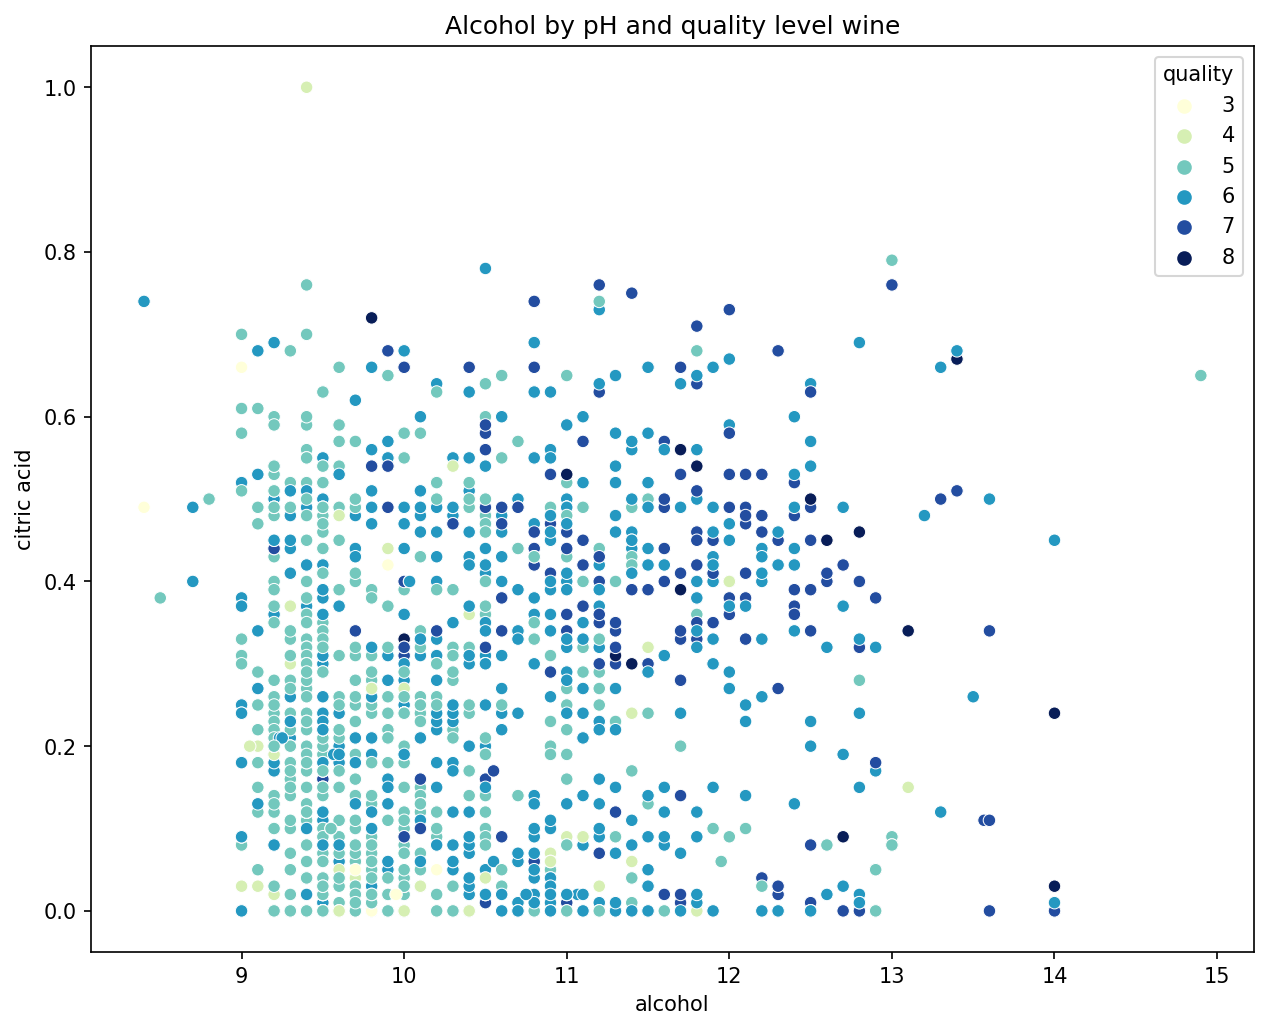

In [ ]:
plt.figure(figsize=(10,8))
plt.title("Alcohol by pH and quality level wine")
sns.scatterplot(x= data.alcohol, y= data["citric acid"], hue=data.quality, palette="YlGnBu", data = data)
plt.show()

next we look about how the distribution of quality wine by alcohol and citric acid. As we can see from visualization above, there are a pattern that high quality wine have citric acid rate between 0,0 until 0,8.

d. Mean of data


In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


We already used describe function before. Now we use again to see mean from our data. 

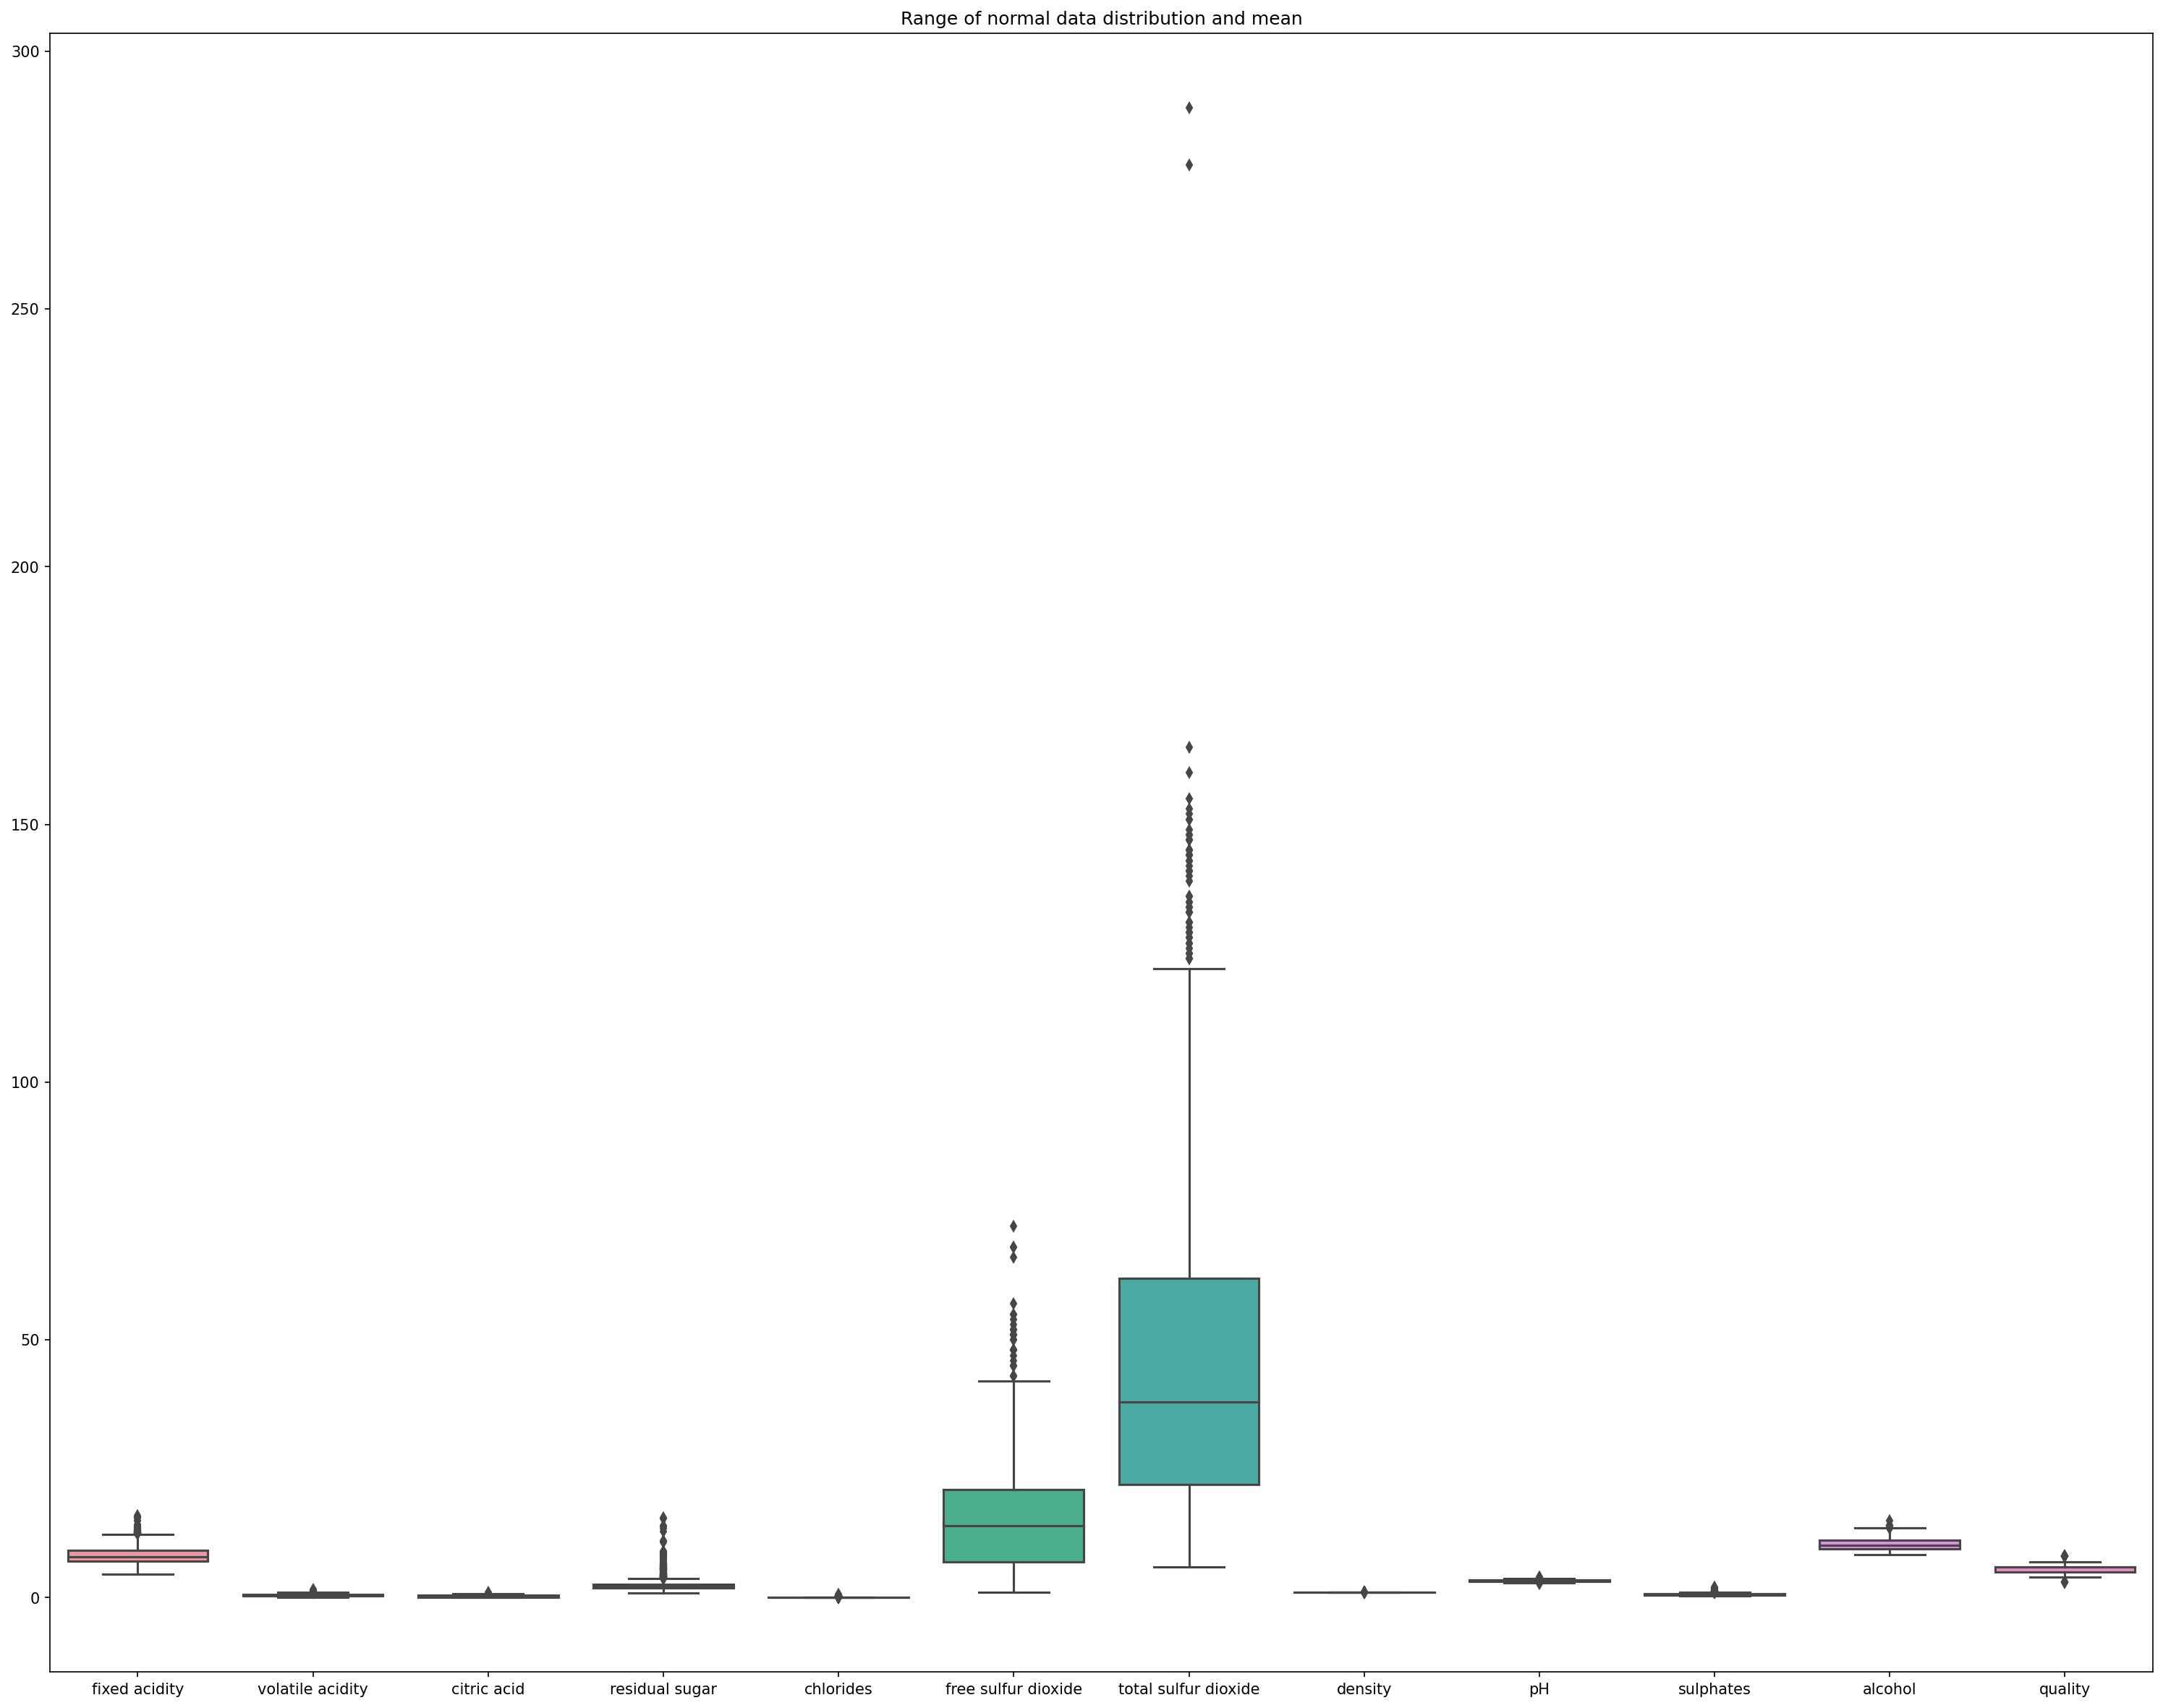

In [ ]:
plt.figure(figsize=(25,20))
plt.title("Range of normal data distribution and mean")
sns.boxplot(data = data)
plt.show()

The visualization is not clear enough to be analysed. Because some column have a very big scale compared to others. So for now, we can analyse only 2 column that give clear enough visualization, which is free sulfuf dioxide and total sulfur dioxide. Total sulfur doxide have a mean about 40, and free sulfur dioxide have mean about 20. As we can see total sulfur dioxide have an outlier data, it's about 2 row data which have a value above 200. 

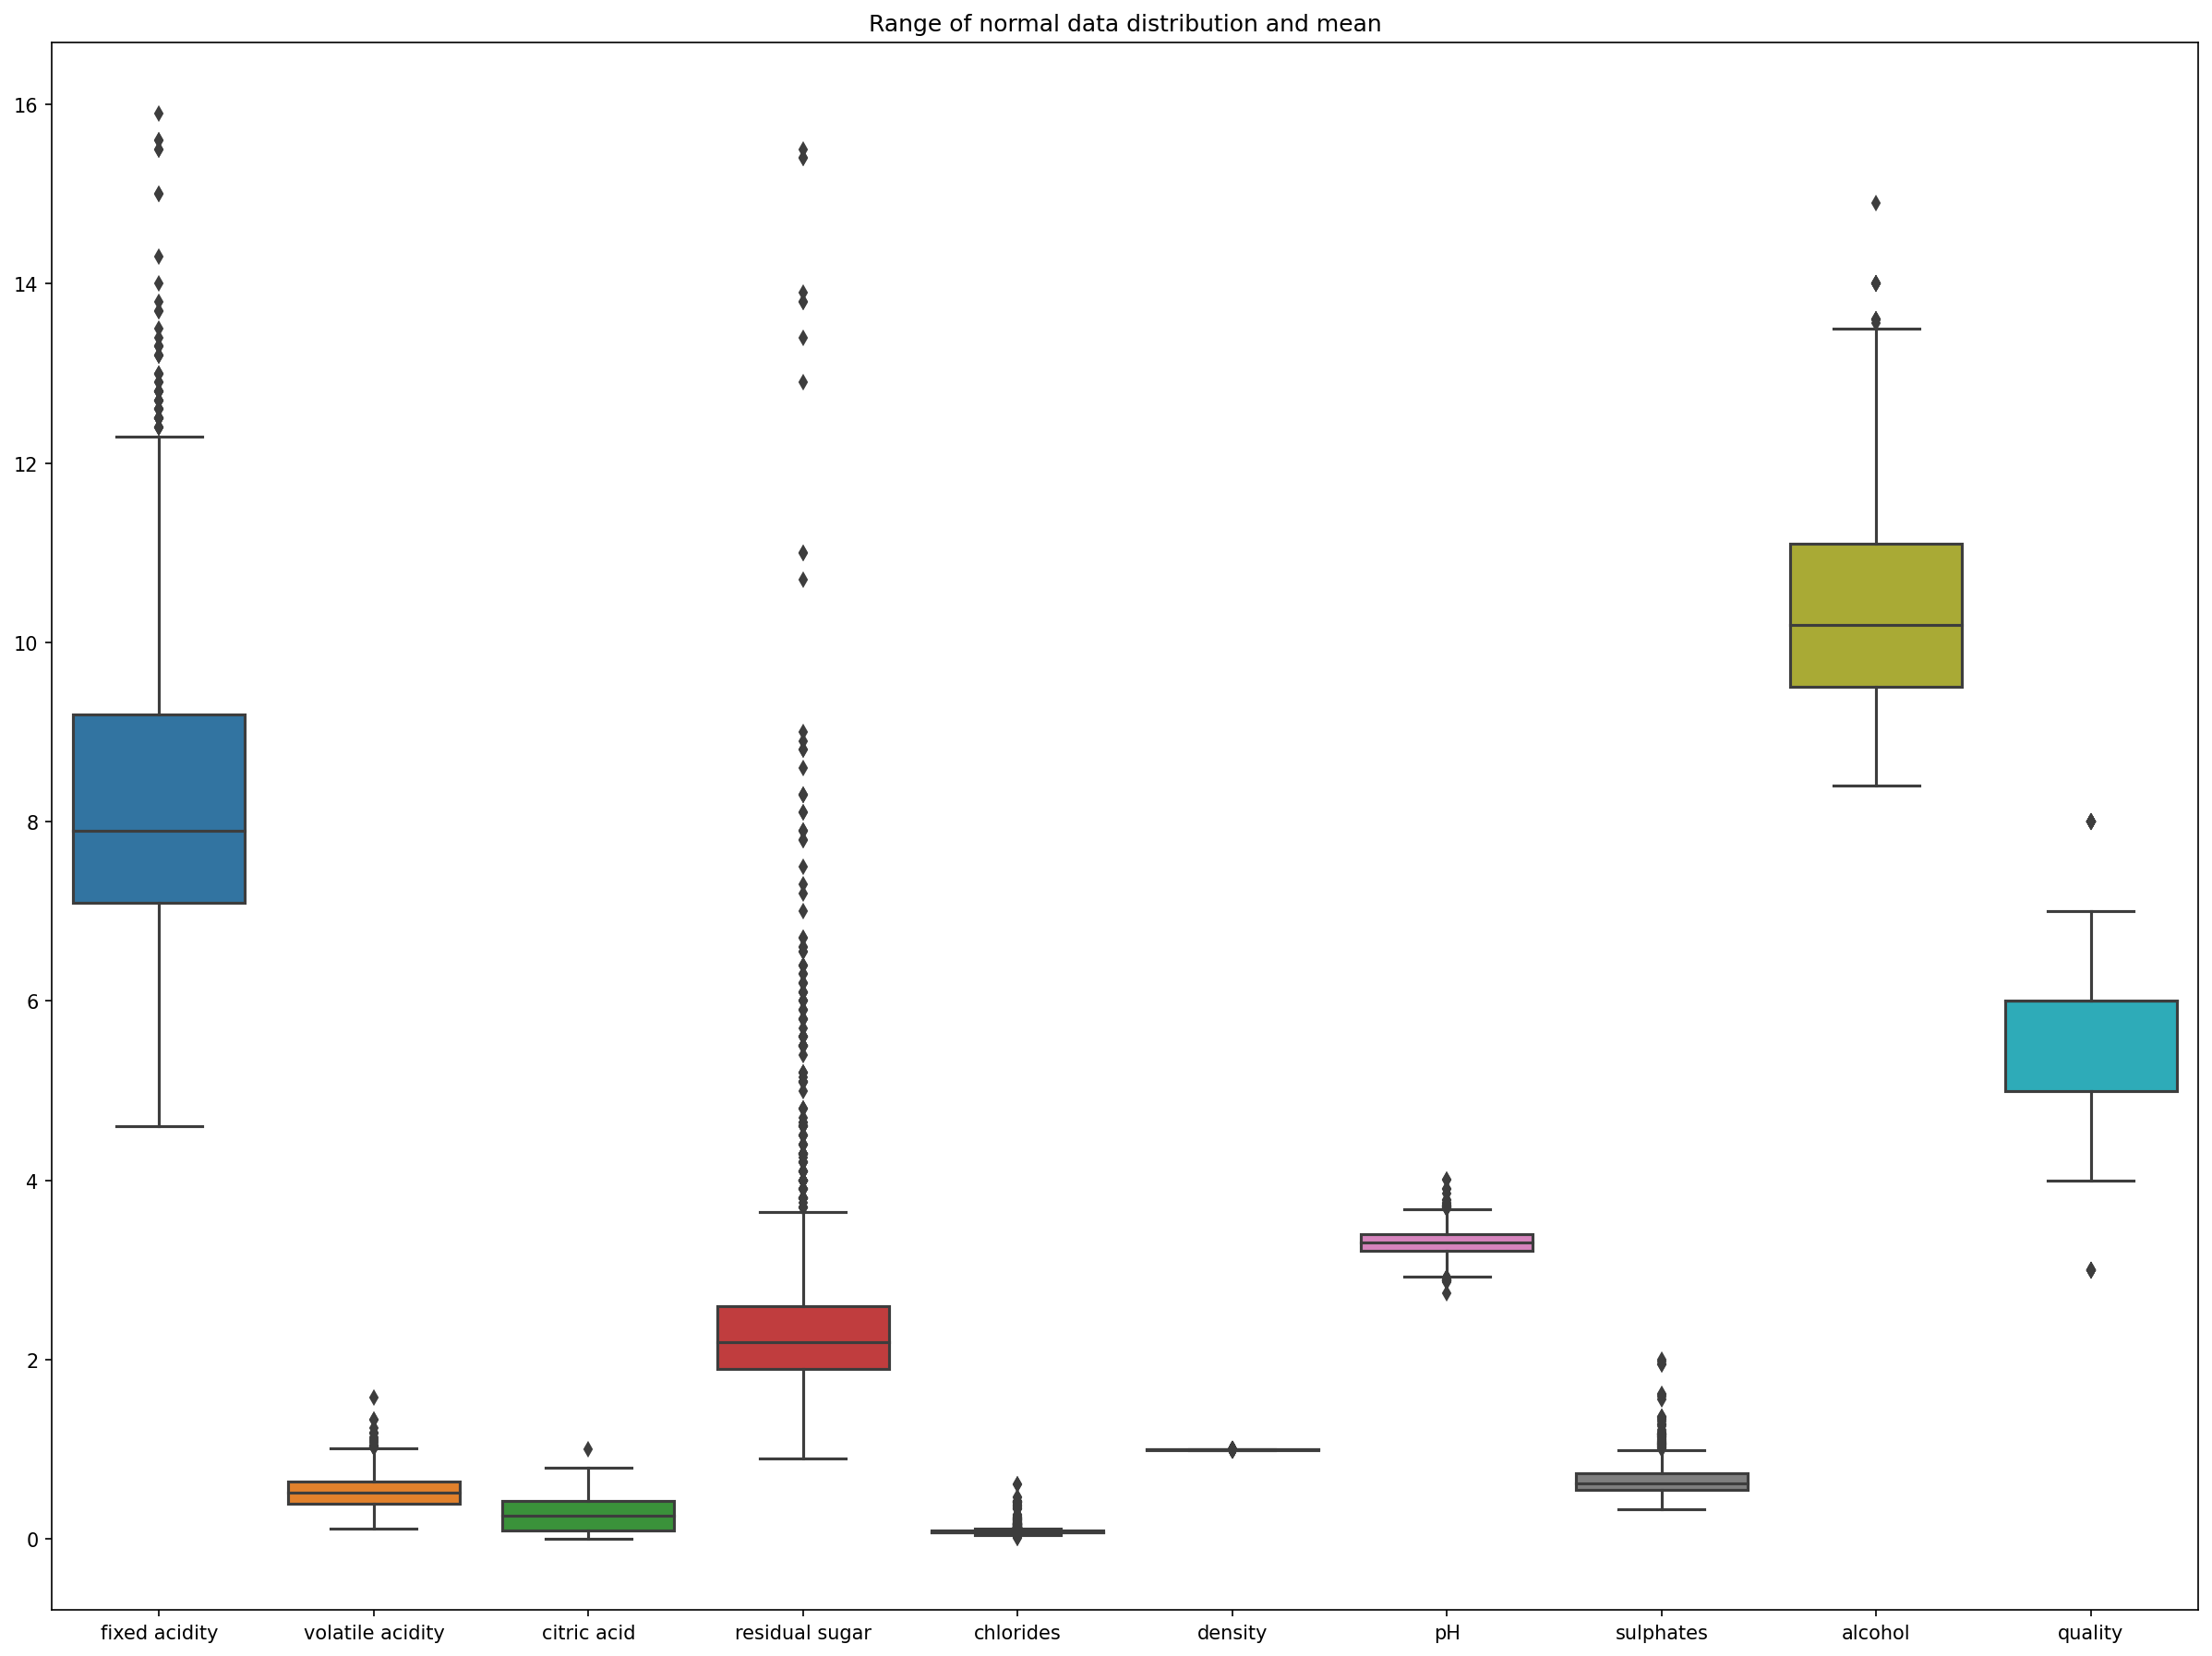

In [ ]:
temp_data = data.drop(["total sulfur dioxide", "free sulfur dioxide"], axis = 1)
plt.figure(figsize=(20,15))
plt.title("Range of normal data distribution and mean")
sns.boxplot(data = temp_data)
plt.show()

Now the vizualization clear enough to be analyzed. The other column data looks good. They don't have outlier data.


Step 4. Crete the machine learning model

In [ ]:
class RidgeRegression():
  def fit(self, X, y, ridge, ld):
    if ridge :
      I = np.eye(X.shape[0],X.shape[1])
      X_sum = X + ld * I
      X_new = np.hstack([X_sum, np.ones([X.shape[0], 1])])
      W = y @ np.linalg.pinv(X_new).T
    else :
      X_new = np.hstack([X, np.ones([X.shape[0], 1])])
      W = y @ np.linalg.pinv(X_new).T
    self.coef_ = W[:-1]
    self.intercept_ = W[-1]
  def predict(self, X):
    return self.coef_ @ X.T + self.intercept_

We create a custom regression using Ridge formula.

Step 5. Predict and show MAE score. And explain goodnes of model created.

In [ ]:
X = data.drop(["quality"], axis = 1)
y = data["quality"]

Split the data into var X (features) and y (predict).

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

Split data into data test and data train

In [ ]:
model = RidgeRegression()
model.fit(X_train,y_train,True, 1.5)

Now it's time to create our model. My model saved in variable named model, then we use fit method to train our model. Fit method require 4 parameter, X and y train data, True or false for decide the training use ridge formula or not and last the lamda, that's hyperparameter that we can decide the value by ourselves.

In [ ]:
y_pred = model.predict(X_test)

Next we try to predict the result using predict method. we predict the data test and save the result in variable named y_pred.

In [ ]:
sum(abs(y_test - y_pred)) / y_test.shape[0]

0.5292095679151128

Then we count the MAE or Mean Absolute Error value. And the result i close to zero. That means our model is good enough for predict this data, because our MAE is not exactly zero that means our model is overfitting and not to big that means our model not underfitting. 

In [ ]:
for test, pred in zip(y_test[:5], y_pred[:5]):
  print("hasil test dan predict adalah : {:n} dan {:.2f}".format(test, pred))

hasil test dan predict adalah : 7 dan 6.11
hasil test dan predict adalah : 6 dan 5.69
hasil test dan predict adalah : 5 dan 5.35
hasil test dan predict adalah : 6 dan 6.91
hasil test dan predict adalah : 6 dan 5.45


Last we try to get the result of prediction and see how well it is. And the result is looks pretty good.